In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from preprocess_train import load_chunk
import exploration as e

In [3]:
# Load data
X = load_chunk("data/wrangled/train.csv", 100000)

AFTER LOADING: <class 'pandas.core.frame.DataFrame'> - (100000, 83)



C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2901: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


# First Look

In [6]:
X.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,100000.0,99639.000000,100000.000000,4890.000000,99607.000000,99607.000000,99607.000000,100000.000000,100000.000000,96385.000000,...,98167.000000,100000.000000,36341.0,99815.000000,100000.000000,100000.00000,99157.000000,96585.000000,96585.000000,100000.000000
mean,0.0,6.845643,0.017630,1637.011247,47876.296023,1.322809,1.019989,0.987270,108.188050,81072.575307,...,33056.529618,0.484990,0.0,0.006642,0.125420,0.03715,0.057515,0.281607,7.850960,0.499280
std,0.0,1.025645,0.131603,999.936760,14023.317478,0.519449,0.162839,0.112107,62.989406,48941.678952,...,21224.208041,0.499777,0.0,0.081230,0.331196,0.18913,0.232825,0.449785,4.565716,0.500002
min,0.0,0.000000,0.000000,1.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,...,5.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,788.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36303.000000,...,13154.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,1632.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,...,33070.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,10.000000,0.000000
75%,0.0,7.000000,0.000000,2290.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,123627.000000,...,52458.000000,1.000000,0.0,0.000000,0.000000,0.00000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,3195.000000,70486.000000,5.000000,4.000000,1.000000,222.000000,167953.000000,...,72091.000000,1.000000,0.0,1.000000,1.000000,1.00000,1.000000,1.000000,15.000000,1.000000


In [5]:
# show general info
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 83 columns):
MachineIdentifier                                    100000 non-null object
ProductName                                          100000 non-null object
EngineVersion                                        100000 non-null object
AppVersion                                           100000 non-null object
AvSigVersion                                         100000 non-null object
IsBeta                                               100000 non-null int64
RtpStateBitfield                                     99639 non-null float64
IsSxsPassiveMode                                     100000 non-null int64
DefaultBrowsersIdentifier                            4890 non-null float64
AVProductStatesIdentifier                            99607 non-null float64
AVProductsInstalled                                  99607 non-null float64
AVProductsEnabled                                    9960

# Balance of dataset

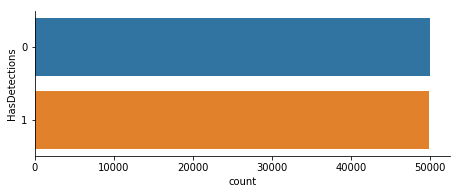

In [4]:
e.show_balance(X, "HasDetections")

# Missing data

In [7]:
e.show_missing_data(X, 40)

                                                   Total  Percent
PuaMode                                            99969  0.99969
Census_ProcessorClass                              99573  0.99573
DefaultBrowsersIdentifier                          95110  0.95110
Census_IsFlightingInternal                         83163  0.83163
Census_InternalBatteryType                         71240  0.71240
Census_ThresholdOptIn                              63738  0.63738
Census_IsWIMBootEnabled                            63659  0.63659
SmartScreen                                        35731  0.35731
OrganizationIdentifier                             30664  0.30664
SMode                                               5932  0.05932
CityIdentifier                                      3615  0.03615
Wdft_IsGamer                                        3415  0.03415
Wdft_RegionIdentifier                               3415  0.03415
Census_InternalBatteryNumberOfCharges               3049  0.03049
Census_Fir

# Look at correlations

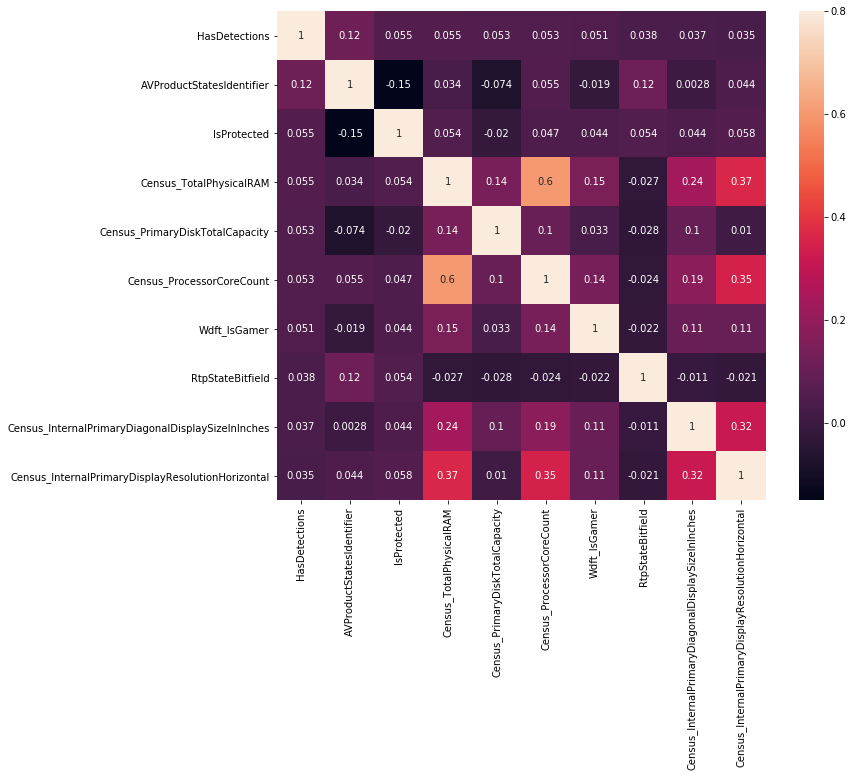

In [9]:
most_correlated = e.get_k_most_correlated(X, "HasDetections", 10)
e.correlation_matrix(X[most_correlated])

# Outliers (Work in progress)

In [ ]:
# potentialle DBscan etc.